In [382]:
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

In [384]:
import os
os.chdir(r"C:\Users\PC\Downloads\Notebook Py")

housing = pd.DataFrame(pd.read_csv("Housing.csv"))

In [386]:
# Check the head of the dataset
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [390]:
# Check for missing values
print("\nMissing values in each column:")
print(housing.isnull().sum())


Missing values in each column:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [394]:
# Data information
print("\nDataset information:")
housing.info()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [396]:
# Summary statistics
print("\nStatistical summary of numerical columns:")
print(housing.describe())


Statistical summary of numerical columns:
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


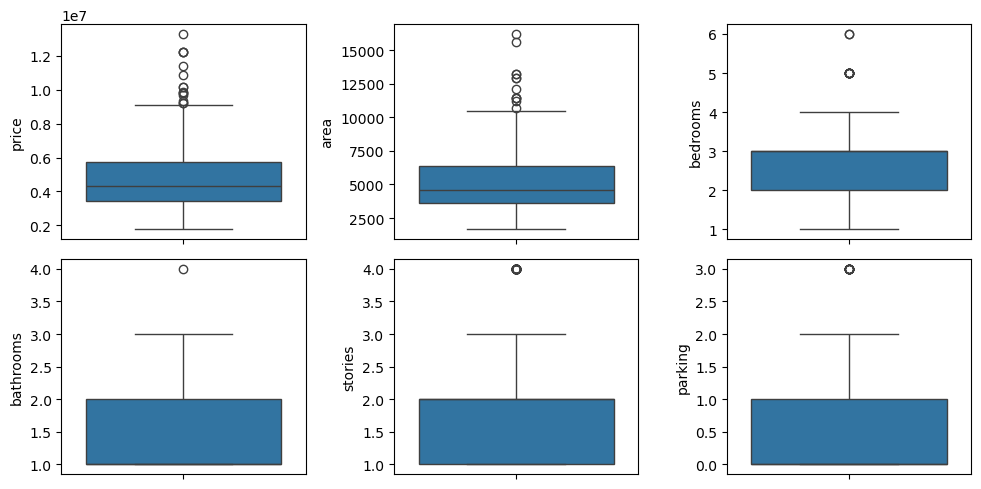

In [398]:
 # Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

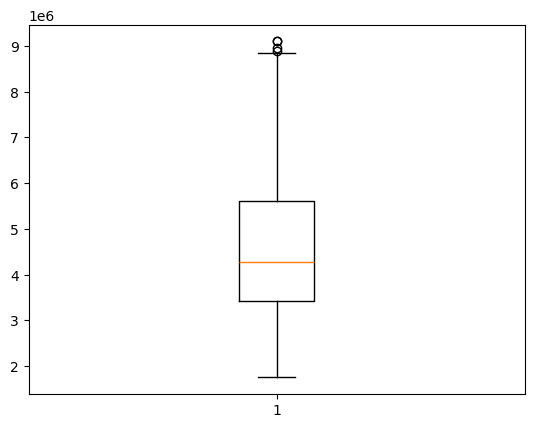

In [399]:
# outlier treatment for area

Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]
plt.boxplot(housing.price)
plt.show()

In [402]:
# After Outlier Treatment
print(housing.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.300000e+02    530.000000  530.000000  530.000000  530.000000   
mean   4.600663e+06   5061.518868    2.943396    1.260377    1.788679   
std    1.596119e+06   2075.449479    0.730515    0.464359    0.861190   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3547.500000    2.000000    1.000000    1.000000   
50%    4.270000e+06   4500.000000    3.000000    1.000000    2.000000   
75%    5.600000e+06   6315.750000    3.000000    1.000000    2.000000   
max    9.100000e+06  15600.000000    6.000000    3.000000    4.000000   

          parking  
count  530.000000  
mean     0.664151  
std      0.843320  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


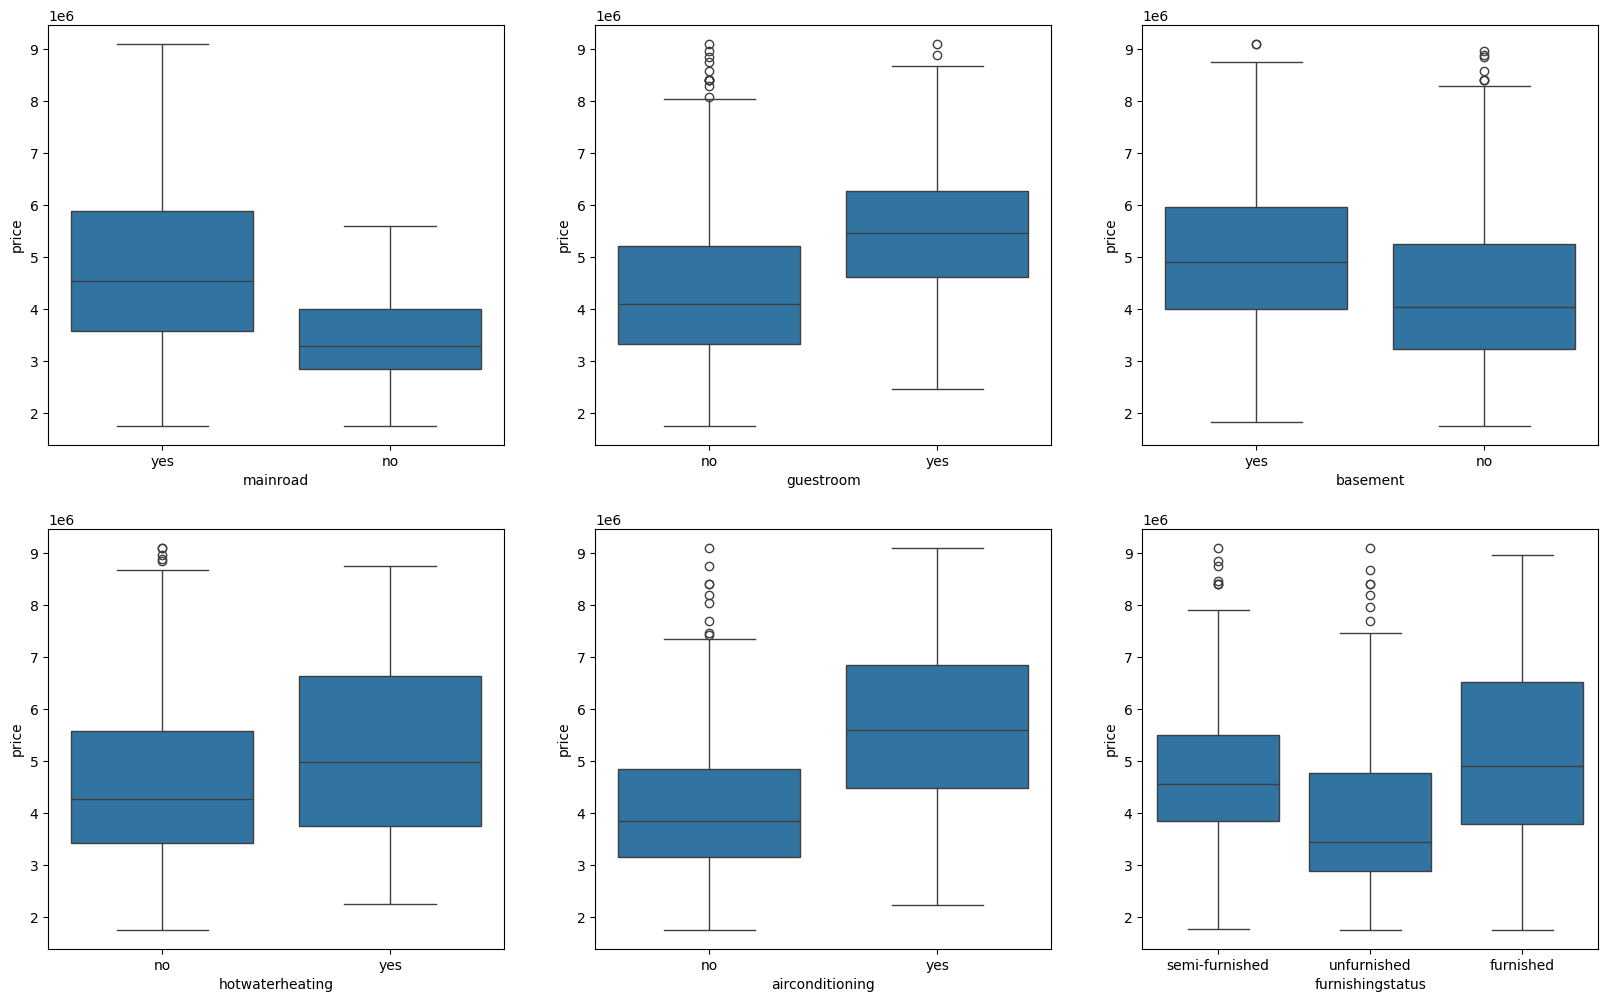

In [404]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

In [406]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

In [408]:
# Encoding furnishingstatus

# Checking unique values in the column
unique_values = housing['furnishingstatus'].unique()
print(unique_values)




['semi-furnished' 'unfurnished' 'furnished']


In [410]:
# One-Hot Encoding of the 'furnishingstatus' column
furnishingstatus_encoded = pd.get_dummies(housing['furnishingstatus'], prefix='furnishingstatus', drop_first=False)

# Concatenate the encoded columns with the original DataFrame
housing = pd.concat([housing, furnishingstatus_encoded], axis=1)

# Drop the original 'furnishingstatus' column if you no longer need it
housing.drop('furnishingstatus', axis=1, inplace=True)

# Display the first few rows of the updated DataFrame
print(housing.head())




      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
15  9100000  6000         4          1        2         1          0   
16  9100000  6600         4          2        2         1          1   
17  8960000  8500         3          2        4         1          0   
18  8890000  4600         3          2        2         1          1   
19  8855000  6420         3          2        2         1          0   

    basement  hotwaterheating  airconditioning  parking  prefarea  \
15         1                0                0        2         0   
16         1                0                1        1         1   
17         0                0                1        2         0   
18         0                0                1        2         0   
19         0                0                1        1         1   

    furnishingstatus_furnished  furnishingstatus_semi-furnished  \
15                       False                             True   
16                

In [412]:
# List of columns that you want to convert (adjust this list based on your DataFrame)
bool_columns = ['furnishingstatus_furnished', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']  # Replace with your column names

# Loop through each column in the list
for col in bool_columns:
    housing[col] = housing[col].apply(lambda x: 1 if x is True else 0)

# Display the first few rows to verify the changes
print(housing.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
15  9100000  6000         4          1        2         1          0   
16  9100000  6600         4          2        2         1          1   
17  8960000  8500         3          2        4         1          0   
18  8890000  4600         3          2        2         1          1   
19  8855000  6420         3          2        2         1          0   

    basement  hotwaterheating  airconditioning  parking  prefarea  \
15         1                0                0        2         0   
16         1                0                1        1         1   
17         0                0                1        2         0   
18         0                0                1        2         0   
19         0                0                1        1         1   

    furnishingstatus_furnished  furnishingstatus_semi-furnished  \
15                           0                                1   
16                

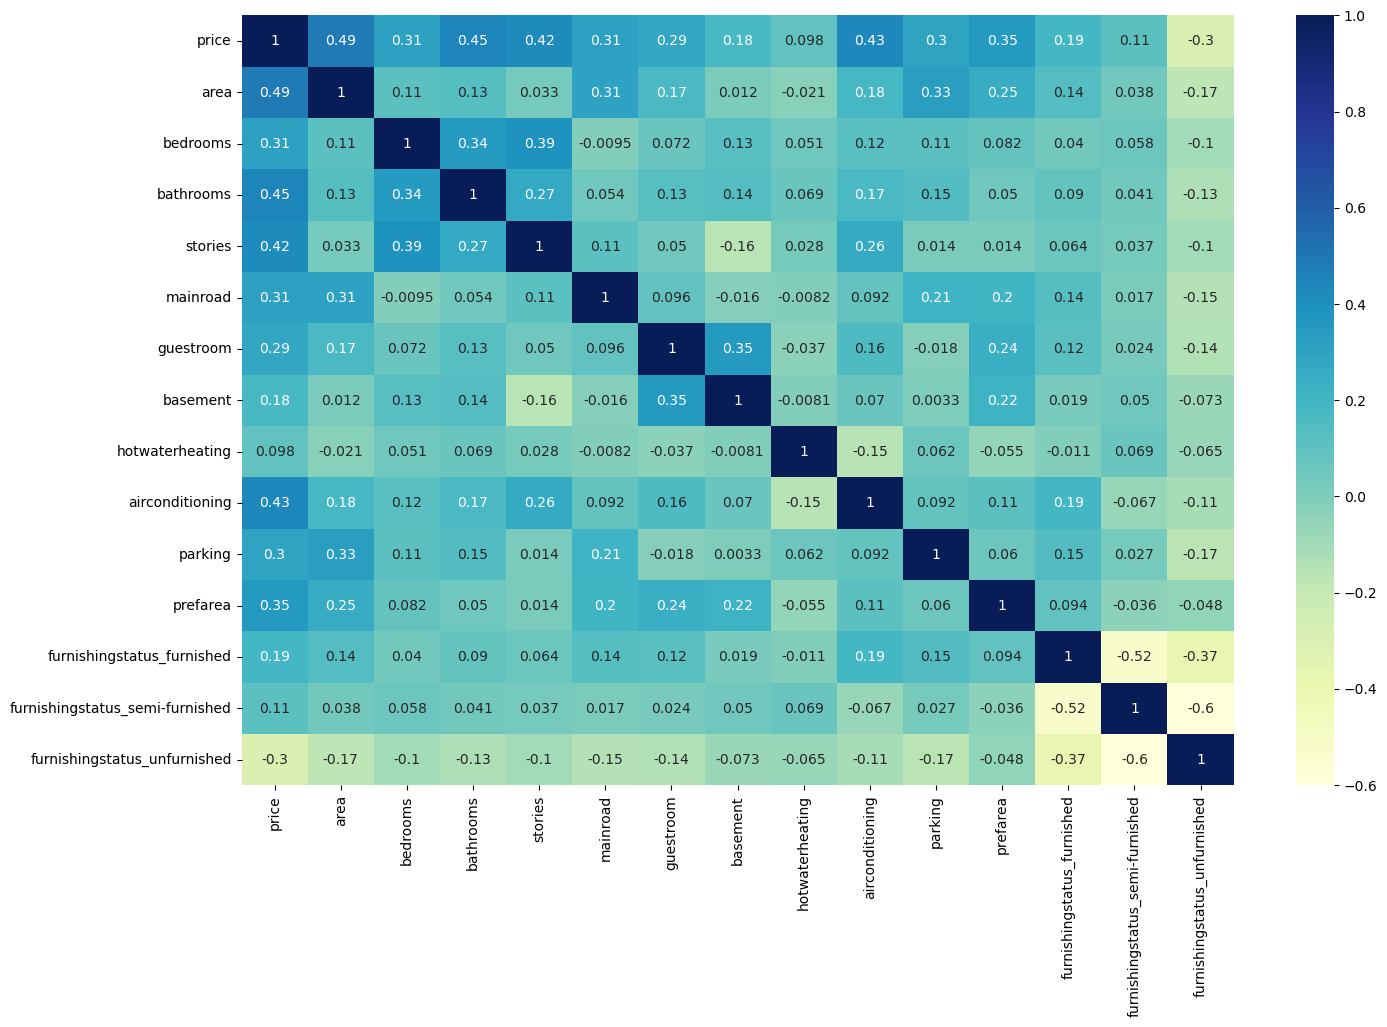

In [422]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     60.89
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           3.72e-87
Time:                        11:10:50   Log-Likelihood:                -6408.7
No. Observations:                 424   AIC:                         1.285e+04
Df Residuals:                     410   BIC:                         1.290e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

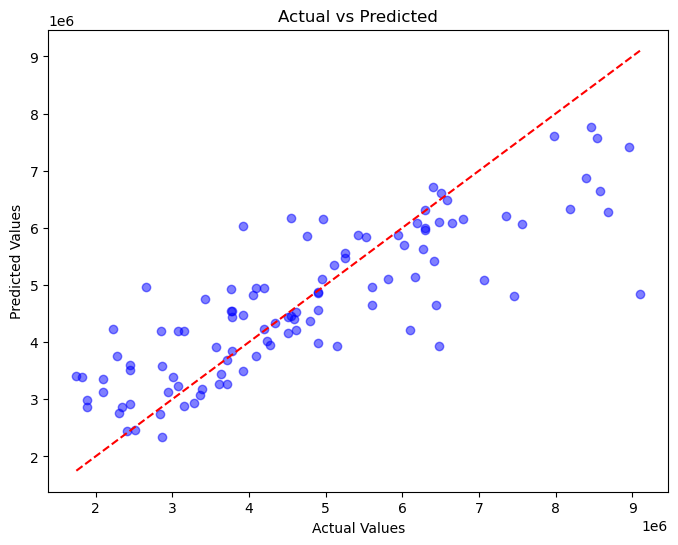

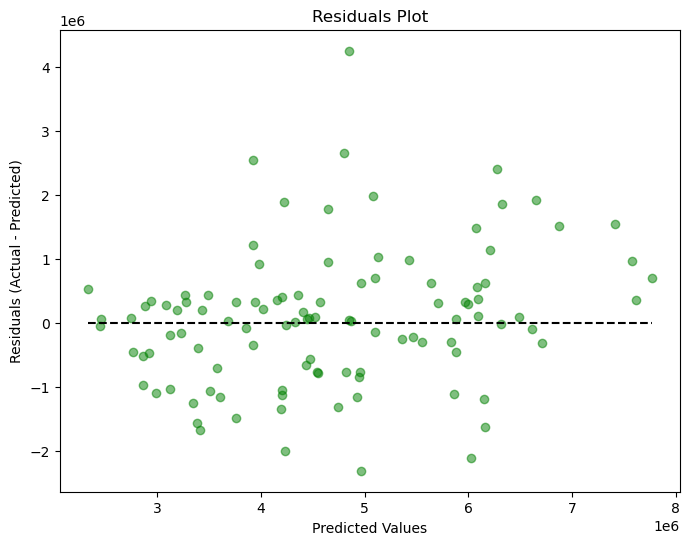

In [462]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Step 1: Data Preparation
X = housing.drop(columns=['price'])  
y = housing['price'] 
# Step 2: Data Splitting (Train-Test Split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Add constant to X_train and X_test for intercept 
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Step 4: Model Training using statsmodels (OLS)
model = sm.OLS(y_train, X_train_sm).fit()

# Step 5: Model Summary
print(model.summary())

# Step 6: Predictions using scikit-learn model
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

# Step 7: Model Evaluation
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# R-squared score (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print(f'R-squared score: {r2}')

# Step 8: Plotting
# Plot the Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Plot residuals (difference between actual and predicted values)
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_test - y_pred, color='green', alpha=0.5)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='black', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()
